<a href="https://colab.research.google.com/github/JairEsc/Aprendizaje/blob/main/DataKitchet_CIMAT/SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit Learn

Una estructura muy común de una clase que implementa algún modelo es ésta:

```
  class SupervisedModel(...):    
    def __init__(self, param1, param2, ...):
      self.p1 = param1
      self.p2 = param2
    
    def fit(self, x, y):
      ...
      return self
        
    def predict(self, x):
      ...
      return yhat
        
    """ Etc..... """   
```

En scikit-learn, se realiza mediante la API, que como se mencionó antes, es uniforme y compartida para todos los objetos de la librería.

La API consiste en tres interfaces complementarias:

- Estimator: Este se considera el núcleo de toda la API, ya que es la interfaz encargada de ajustar los modelos a los datos de entrada. Funciona inicializando el modelo que se utilizará y luego aplicando un método `fit()` que desencadena el proceso de aprendizaje para construir un modelo basado en los datos.

  El método fit() recibe como argumentos los datos de entrenamiento `X_train`, y `y_train` si es un problema de ML supervisado.

  Este método crea el modelo entrenado con los datos de entrada, que luego se pueden usar para predecir.

  Algunos modelos toman otros argumentos además de los datos de entrenamiento, que también se denominan hiperparámetros. Estos hiperparámetros se establecen inicialmente en sus valores predeterminados, pero se pueden ajustar para mejorar el rendimiento del modelo.

  ```
  from sklearn.linear model import LogisticRegression

  clf = LogisticRegression(penalty=”l1”)
  clf.fit(X train, y train)
  ```
  Otros objetos que se implementan con ésta interfase son rutinas de preprocesamiento (p. ej., estandarización de variables), técnicas de reducción de dimensión o técnicas de extracción de características (p. ej., vectorización de documentos de texto).

- Predictor: el predictor toma el modelo creado por el estimador y lo extiende para realizar predicciones sobre datos nuevos `X_test` en función de los parámetros aprendidos durante el entrenamiento del modelo.

  ```
  y pred= clf .predict(X test)
  ```

  Algunos modelos no supervisados también pueden beneficiarse del predictor. Si bien este método no genera un valor objetivo específico, puede resultar útil para asignar una nueva instancia a un clúster, por ejemplo.

  ```
  from sklearn.cluster import KMeans
  km = KMeans(n clusters=10)
  km.fit(X_train)
  clust_pred = km.predict(X_test)
  ```

- Transformer: Muchas veces los datos se modifican o transforman antes de alimentar un modelo. La API contiene un método `transform()` que permite realizar algunas técnicas de preprocesamiento.

  Se puede utilizar para datos de entrada del modelo, y para datos que se introducirán en el modelo para realizar predicciones. Esta última aplicación es crucial para obtener resultados precisos, ya que garantiza que los nuevos datos sigan la misma distribución que los datos utilizados para entrenar el modelo.

  ```
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  X_test = scaler.transform(X_test)
  ```

### Pipelines

Una característica interesante de sklearn es la definición de nuevos estimadores mediante la *composición* de varios estimadores base. Hay dos mecanismos: objetos `Pipeline`y `FeatureUnion`

- Pipelines: composición de *transformers* y *predictors*

![figure](https://miro.medium.com/v2/resize:fit:720/format:webp/1*e6U6j_FJirAbYYYTfEB-wQ.png)

[Fuente](https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2)

```
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
#pipe
#Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
```

- FeatureUnion: Concatena resultados de múltiples objetos transformadores.

Este estimador aplica una lista de objetos *tranformer* en paralelo a los datos de entrada y luego concatena los resultados. Esto es útil para combinar varios mecanismos de extracción de características en un solo *transformer*.

![figure](https://miro.medium.com/max/836/1*rcxISJ9JiW1EUoqjEl3n-g.png)

[Fuente](https://sefidian.com/2022/08/30/a-tutorial-on-scikit-learn-pipeline-columntransformer-and-featureunion/)

![figure](https://miro.medium.com/max/1075/1*CCZdpkE_Zt_nY4UNN-_OJQ.png)

[Fuente](https://sefidian.com/2022/08/30/a-tutorial-on-scikit-learn-pipeline-columntransformer-and-featureunion/)


```
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature selection import SelectKBest

union = FeatureUnion([(”pca”, PCA()),
                      (”kpca”, KernelPCA(kernel=”rbf”))])

Pipeline([(”feat union”, union),
          (”feat sel”, SelectKBest(k=10)),
          (”log reg”, LogisticRegression(penalty=”l2”))
          ]).fit(X_train, y_train).predict(X test)
```


# Ejemplo:
## Datos genómicos CAMDA 2020


In [1]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.9 MB/s eta 0:00:00


In [4]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
import seaborn as sns

otus = pd.read_csv("OTUS_conservados.csv", index_col="X")#Agregué el csv manualmente
print(otus.shape)
otus.head()

(3043, 606)


,New_Labels,Latitude,Longitude,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,...,X210657,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,WarmT-SumDry-HotSum0,33.194,-117.241,0.003306,0.0,0.0,0.0,0.0,0.005785,0.00000,...,0.0,0.00000,0.004752,0.007231,0.000000,0.0,0.0,0.002273,0.00000,0.00000
1001.skd3,WarmT-SumDry-HotSum0,33.194,-117.241,0.002699,0.0,0.0,0.0,0.0,0.001080,0.00018,...,0.0,0.00000,0.003419,0.029872,0.000180,0.0,0.0,0.000720,0.00000,0.00000
1001.skm1,WarmT-SumDry-HotSum0,33.194,-117.241,0.001304,0.0,0.0,0.0,0.0,0.002934,0.00000,...,0.0,0.00000,0.004563,0.004563,0.000326,0.0,0.0,0.001304,0.00000,0.00000
1001.skb3,WarmT-SumDry-HotSum0,33.194,-117.241,0.009130,0.0,0.0,0.0,0.0,0.004966,0.00000,...,0.0,0.00016,0.004645,0.008169,0.000961,0.0,0.0,0.002243,0.00016,0.00032
1001.skm2,WarmT-SumDry-HotSum0,33.194,-117.241,0.001022,0.0,0.0,0.0,0.0,0.000341,0.00000,...,0.0,0.00000,0.005112,0.010907,0.000682,0.0,0.0,0.002045,0.00000,0.00000


Le pasamos una copia de los datos.
Usamos el sistema de coordenadas de las variables: Longitud, Latitude. El parámetro 'crs' es la manera de acomodar coordenadas

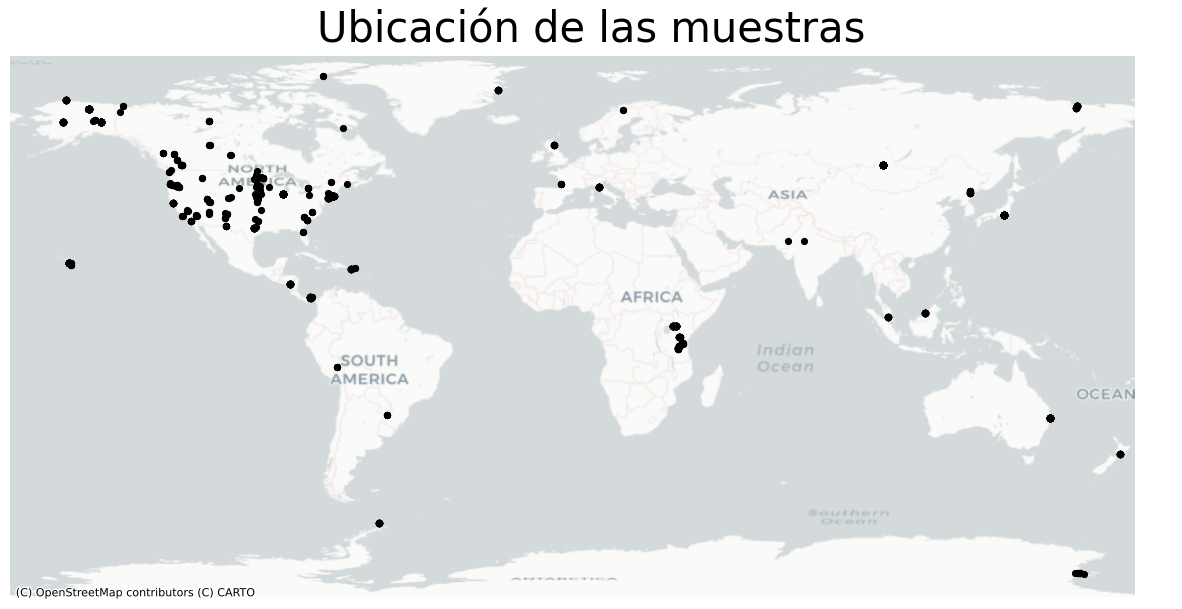

In [5]:
otus_gdf = gpd.GeoDataFrame(otus.copy(),
geometry=gpd.points_from_xy(otus['Longitude'], otus['Latitude']), crs='EPSG:4326')

fig, ax = plt.subplots(1, figsize=(15, 15))
otus_gdf.plot(marker='.', c='black', ax=ax, markersize=70, zorder=1)
plt.title("Ubicación de las muestras",fontsize=30)
plt.axis("off")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

Quitar las primeras tres columnas.
El nombre de la primera la guardamos.
Concatenamos los nombres que conservamos y el de las etiquetas(primera).
Simplemente estamos cambiando de lugar la etiqueta.

In [9]:
cont_names = list(otus.drop(["New_Labels","Latitude", "Longitude"], axis=1).columns)
y_names = ["New_Labels"]
train_df = otus[cont_names+y_names]


## Reducción de dimensiones

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

y = np.array(train_df[y_names]).ravel()
#y es la variable respuesta. ravel() qué hace?
X = np.array(train_df.drop(y_names,axis=1)).astype('float')
#X son los datos excepto la etiqueta
X_std = StandardScaler().fit_transform(X)
#Cambio de escala. (x-u)/s
ncomp=3
#Arbitrario
otus_pca=PCA(ncomp)
#Predefine función otus_pca, es un pca con 3 componentes.
otus_pca.fit_transform(X_std)
#Aplica el PCA, pero hace una transformación. ¿por qué?

proj = pd.DataFrame(otus_pca.transform(X_std),columns = ['pc1','pc2','pc3'])
#Guarda el dataFrame y le pone nombres
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y})
#Intercambiamos el pc3 por el clima. Para poder graficarlo en 2D
# Grafica interactiva-------------
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

### Extra:


[Manifold learning](https://scikit-learn.org/stable/modules/manifold.html): reducción de dimensión no lineal.



In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=500)
#X_tsne = tsne.fit_transform(train_img)
#tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'digit': y_train})
X_tsne = tsne.fit_transform(X_std)

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'clima': y})

In [ ]:
# Grafica interactiva
fig = px.scatter(tsne_dataset, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


### Ahora podemos hacer algo de aprendizaje no-supervisado:


#### Clustering jerárquico aglomerativo

En clustering jerárquico aglomerativo, los *objetos* se “aglomeran” para formar clústers de 3 formas principalmente:
- Single linkage o vecino más cercano
- Complete linkage o vecino más lejano
- Average linkage

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='average')
#n_clusters=None hace que no limite el número de grupos
cluster.fit_predict(proj)
#Lo ejecuta. Hay un grupo para cada muestra.
print('Clusters: ',cluster.n_clusters_)

Clusters:  3043


In [16]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

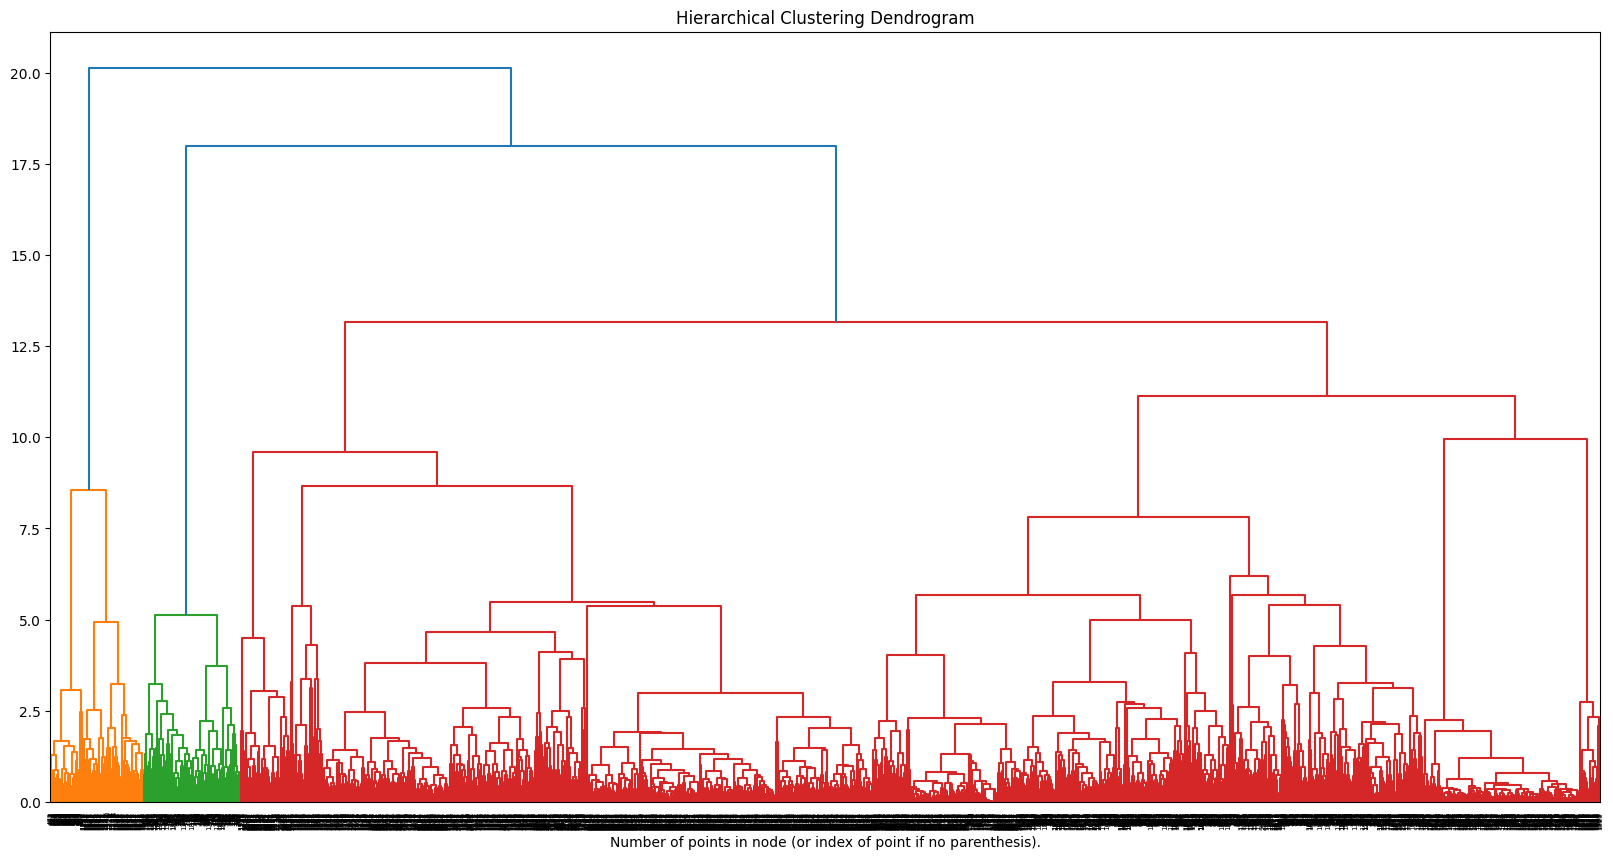

In [17]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster) #, truncate_mode='level', p=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### $k-$ means

Es un algoritmo combinatorio que asigna $n$ objetos en $k$ clústers, de acuerdo al criterio de distancia mínima entre cada objeto y los *prototipos* de cada clúster. Generalmente, se usa el centroide como prototipo de los clústers.

In [18]:
from sklearn import cluster

# K-MEANS en los componentes principales de la matriz de similaridad
k = 20
#Hay que predefinir el número de grupos.
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
k_means.fit(proj)
#cl_pred = pd.DataFrame(k_means.predict(proj)).astype('category')
cl_pred = pd.Series(k_means.predict(proj), dtype="category")
#cl_pred = k_means.predict(proj)
cl_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0        2
1        2
2        2
3        2
4        2
        ..
3038    17
3039    17
3040    17
3041    17
3042     1
Length: 3043, dtype: category
Categories (20, int64): [0, 1, 2, 3, ..., 16, 17, 18, 19]

In [19]:
pca_clust = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y, 'clus': cl_pred})

fig = px.scatter(pca_clust, x='pc1', y='pc2', hover_data=['clima'], color = 'clus')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

Métricas de desempeño en aprendizaje no supervisado: Medida de siluetas.

### Continuación: Para divisiones no-lineales
### Spectral clustering
### Kernel K-Means

### Clasificación

Ver la [documentación](https://scikit-learn.org/stable/supervised_learning.html)

Para fines didácticos, restrinjo los datos a aquellos que tienen al menos `n_min` datos en su categoría:

In [20]:
def get_reduced_data(data,y_counts,ylab='New_Labels',n_min=20):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [21]:
cont_names = list(otus.drop(["New_Labels","Latitude", "Longitude"], axis=1).columns)
y_names = ["New_Labels"]
otus_df = otus[cont_names+y_names]
y_counts = otus_df.New_Labels.value_counts()

In [22]:
n_min = 100
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'New_Labels',n_min)
otus_val_df.shape

(2107, 604)

In [23]:
y_val.index

Index(['Snow-FullH-HotSum2', 'Snow-FullH-CoolSum8', 'WarmT-FullH-HotSum3',
       'WarmT-FullH-HotSum2', 'Snow-WintDry-CoolSum7', 'Equat-FullH5',
       'WarmT-FullH-HotSum6'],
      dtype='object')

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline
#plt.style.use('seaborn')

Creo las variables dependientes e independientes. Para las variables dependientes, uso una codificación numérica de la respuesta con `LabelEncoder`

In [25]:
y = np.array(otus_val_df[y_names]).ravel()
X = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

le = preprocessing.LabelEncoder()
le.fit(y)

y_cat = le.transform(y)


Creamos conjunto de datos de entrenamiento y prueba

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)

In [27]:
logreg = LogisticRegression(solver='sag')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


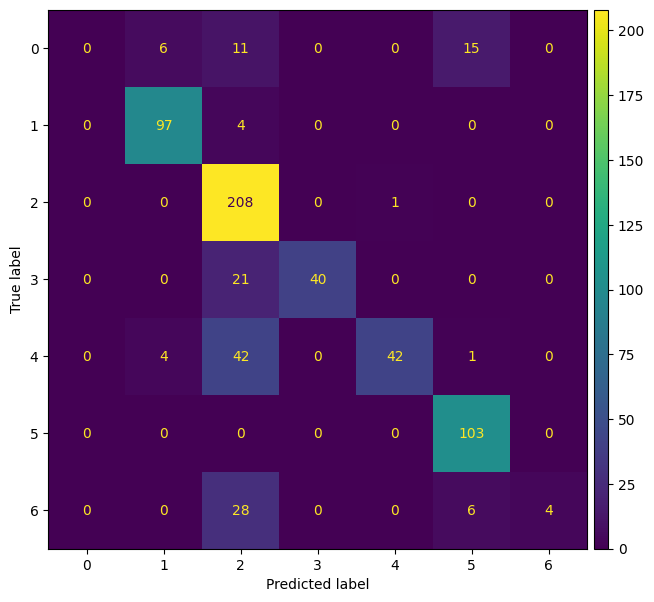

In [28]:
plt.style.use('default')
cm = metrics.confusion_matrix(y_test,y_pred)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.91      0.96      0.93       101
           2       0.66      1.00      0.80       209
           3       1.00      0.66      0.79        61
           4       0.98      0.47      0.64        89
           5       0.82      1.00      0.90       103
           6       1.00      0.11      0.19        38

    accuracy                           0.78       633
   macro avg       0.77      0.60      0.61       633
weighted avg       0.79      0.78      0.74       633



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [30]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_train_std)
X_train_pca = otus_pca.transform(X_train_std)
proj = pd.DataFrame(X_train_pca,columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y_train})

In [31]:
# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(autosize=False,width=800,height=800,)
fig.show()

In [32]:
X_test_std = scaler.fit_transform(X_test)
X_test_pca = otus_pca.transform(X_test_std)

In [33]:
logreg2 = LogisticRegression(solver='newton-cg')
logreg2.fit(X_train_pca, y_train)

y_pred2 = logreg2.predict(X_test_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_pca, y_test)))
#En principio deberíamos usar accuracy solo cuando las clases están balanceadas.

Accuracy of logistic regression classifier on test set: 0.85


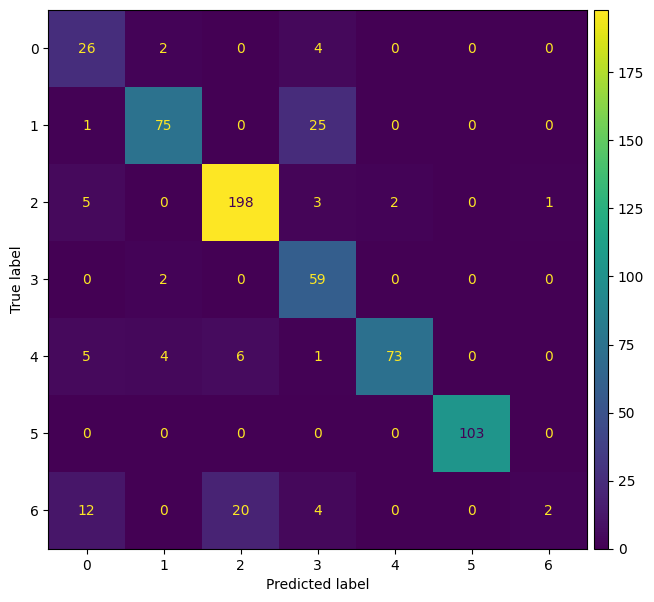

In [34]:
cm = metrics.confusion_matrix(y_test,y_pred2)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [35]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.53      0.81      0.64        32
           1       0.90      0.74      0.82       101
           2       0.88      0.95      0.91       209
           3       0.61      0.97      0.75        61
           4       0.97      0.82      0.89        89
           5       1.00      1.00      1.00       103
           6       0.67      0.05      0.10        38

    accuracy                           0.85       633
   macro avg       0.80      0.76      0.73       633
weighted avg       0.86      0.85      0.83       633



## Conclusiones

Scikit-learn es una herramienta muy completa para proyectos que involucran ciencia de datos a diferentes niveles.

La curva de aprendizaje es rápida, y siempre hay documentación disponible para las dudas que puedan surgir.

La mejor forma de aprenderla es programando...